# 1. generar el caso de prueba

In [ ]:
import random

def gen_test_case():
    randomGen = random.Random()
    # categorias
    randomEpsilon = randomGen.uniform(0.3, 0.7)
    nCats = randomGen.randint(2, 5)
    # items por categoria
    itemsCat = randomGen.randint(2, 5)
    # rangos de fairness
    lranks = []
    uranks = []
    for i in range(nCats):
        lrank = randomGen.randint(1, itemsCat-1)
        urank = randomGen.randint(lrank+1, itemsCat)
        lranks.append(lrank)
        uranks.append(urank)

    # genero items fase 1
    minValues = []
    itemsGen = []

    optimalValue = 0
    maxWeight = 0
    for i in range(nCats):
        items = []
        minValue = randomGen.randint(3, 6)
        for j in range(uranks[i]):
            peso = randomGen.randint(1, 10)
            valor = randomGen.randint(minValue, 10)
            optimalValue += valor
            maxWeight += peso
            items.append((peso, valor))
        minValues.append(minValue)
        itemsGen.append(items)

    # genero items de nuevo

    for i in range(nCats):
        for j in range(uranks[i], itemsCat):
            peso = randomGen.randint(1, 10)
            valor = randomGen.randint(0, minValues[i])
            itemsGen[i].append((peso,valor))
    returnObject = {
        "lowerRanks":lranks,
        "upperRanks":uranks,
        "nCategories":nCats,
        "optimalValue":optimalValue,
        "maxWeight":maxWeight,
        "epsilon":randomEpsilon,
        "itemMatrix":itemsGen
    }
    print(returnObject)
    return returnObject
# print(lranks,uranks,sep="canoa")
# print(itemsGen,optimalValue,maxWeight,sep="canoa")

def parse_input(obj) -> str:
    inputString = ""
    inputString += f'{obj["nCategories"]}\t{obj["maxWeight"]}\t{obj["epsilon"]}\n'
    for cat in range(obj["nCategories"]):
        inputString += f'{obj["lowerRanks"][cat]}\t{obj["upperRanks"][cat]}\n'
        inputString += f'{obj["itemMatrix"][cat][0][0]}'
        for item in range(1,len(obj["itemMatrix"][cat])):
            inputString += f'\t{obj["itemMatrix"][cat][item][0]}'  
        inputString += f'\n'
        inputString += f'{obj["itemMatrix"][cat][0][1]}'
        for item in range(1,len(obj["itemMatrix"][cat])):
            inputString += f'\t{obj["itemMatrix"][cat][item][1]}'
        inputString += f'\n'
    return inputString.rstrip("\n")

def gen_test_case_input():
    testCase = gen_test_case()
    print(testCase)
    return {"input": parse_input(testCase),"case": testCase}

# 2. ejecutar el caso de prueba y medir tiempos

In [ ]:
import time
import subprocess
# myrandomdataparsed = "3\t67\t0.5\n1\t2\n15\t10\t20\n2\t4\t6\n2\t3\n10\t20\t30\n1\t7\t2\n2\t5\n12\t15\t18\n5\t4\t3"
stdincase = gen_test_case_input()
optimalValue = stdincase["case"]["optimalValue"]
print(stdincase)
commandNuestro = ["python",r".\algoritmoNuestro.py"]
commandPaper = ["python",r".\algoritmoPaper.py"]
pNuestro = subprocess.Popen(commandNuestro, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
pPaper = subprocess.Popen(commandPaper, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

timestart = time.time()
output = pPaper.communicate(input=stdincase["input"].encode())[0]
timeend = time.time()
timestart2 = time.time()
output2 = pNuestro.communicate(input=stdincase["input"].encode())[0]
timeend2 = time.time()
totaltime = timeend-timestart 
totaltime2 = timeend2-timestart2
print("algoritmo paper output")
paperoutput = int(output.decode('utf-8'))
print(paperoutput)
print("algoritmo Nuestro output")
nosotrosoutput = int(output2.decode('utf-8'))
print(nosotrosoutput)
print("algoritmo paper tiempo")
print(totaltime)
print("algoritmo Nuestro tiempo")
print(totaltime2)
print(f"valor optimo: {optimalValue}")
print("distancia al optimo paper")
print(abs(optimalValue-paperoutput))
print("distancia al optimo nuestro")
print(abs(optimalValue-nosotrosoutput))


# 2.5 Ejecutar caso de prueba v2

In [ ]:
import time
import subprocess
# myrandomdataparsed = "3\t67\t0.5\n1\t2\n15\t10\t20\n2\t4\t6\n2\t3\n10\t20\t30\n1\t7\t2\n2\t5\n12\t15\t18\n5\t4\t3"

def exec_testcase():
    stdincase = gen_test_case_input()
    optimalValue = stdincase["case"]["optimalValue"]
    print(stdincase)
    commandNuestro = ["python",r".\algoritmoNuestro.py"]
    commandPaper = ["python",r".\algoritmoPaper.py"]
    pNuestro = subprocess.Popen(commandNuestro, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    pPaper = subprocess.Popen(commandPaper, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

    timestart = time.time()
    output = pPaper.communicate(input=stdincase["input"].encode())[0]
    timeend = time.time()
    timestart2 = time.time()
    output2 = pNuestro.communicate(input=stdincase["input"].encode())[0]
    timeend2 = time.time()
    totaltime = timeend-timestart 
    totaltime2 = timeend2-timestart2
    paperoutput = int(output.decode('utf-8'))
    nosotrosoutput = int(output2.decode('utf-8'))
    results = {"optimalValue":optimalValue
                ,"resultPaper":paperoutput
                ,"resultNuestro":nosotrosoutput
                ,"timeTakenPaper":totaltime
                ,"timeTakenNosotros":totaltime2
                ,"timeStartPaper":timestart
                ,"timeStartNosotros":timestart
                ,"case":stdincase}
    return results


# 3. tomar tiempos acumualados

In [ ]:
import pathlib
import json

jsonfile = pathlib.Path("exec_data.json")

nExcecutions = 10

if not jsonfile.exists():
    jsonfile.touch()

def save_time():
    with open(jsonfile, "a") as archivo:
        archivo.write("[")
        for i in range(nExcecutions-1):
            jsnstr = json.dumps(exec_testcase())
            archivo.write(jsnstr)
            archivo.write(",")
        jsnstr = json.dumps(exec_testcase())
        archivo.write(jsnstr)
        archivo.write("]")

save_time()


# 4. Graficar

6.725995302200317
11.76799464225769
1.692000389099121
22.6939959526062
9.101998090744019
16.910996913909912
7.211923599243164
0.8809967041015625
5.018998861312866
1.80800461769104


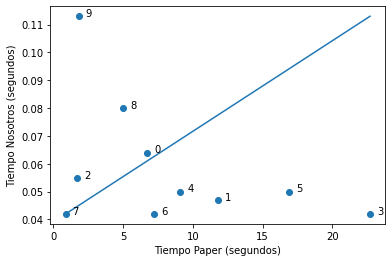

In [9]:
import matplotlib.pyplot as plt
import pathlib
import json

jsonfile = open(pathlib.Path("exec_data.json"))

ejextag = "Tiempo Paper (segundos)"
ejeytag = "Tiempo Nosotros (segundos)"
ejex = []
ejey = []

data = json.load(jsonfile)


for case in data:
    ejex.append(case["timeTakenPaper"])
    ejey.append(case["timeTakenNosotros"])

fig, ax = plt.subplots()
for i in range(len(data)):
    ax.annotate(f"{i}", (ejex[i], ejey[i]),xytext=(ejex[i]+0.5, ejey[i]))

# Crear la figura y los ejes
# Dibujar puntos
ax.scatter(x = ejex, y = ejey)
ax.plot([min(ejex),max(ejex)],[min(ejey),max(ejey)])
ax.set_xlabel(ejextag)
ax.set_ylabel(ejeytag)
# Guardar el gráfico en formato png
# plt.savefig('diagrama-dispersion.png')
# Mostrar el gráfico
plt.show()

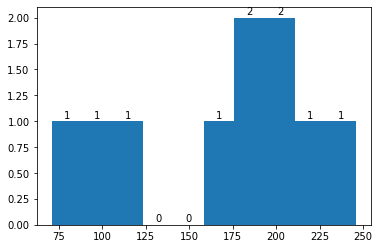

In [20]:
import matplotlib.pyplot as plt
import pathlib
import json

jsonfile = open(pathlib.Path("exec_data.json"))

optimos = []
resultsNosotros = []
resultsPaper = []

distanciasNosotros = []
distanciasPaper = []

data = json.load(jsonfile)


for case in data:
    optimo=case["optimalValue"]
    resultpaper=case["resultPaper"]
    resultnuestro=case["resultNuestro"]
    optimos.append(optimo)
    resultsNosotros.append(resultpaper)
    resultsPaper.append(resultnuestro)
    distanciasNosotros.append(abs(optimo-resultnuestro))
    distanciasPaper.append(abs(optimo-resultpaper))

distanciamaximanosotros = max(distanciasNosotros)
distanciamaximapaper = max(distanciasPaper)

fig, ax = plt.subplots()

ax.hist(distanciasPaper)
bars = ax.patches  
for rect in bars:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, int(height),
            ha='center', va='bottom')

plt.show()
ax.hist(distanciasNosotros)
bars = ax.patches  
for rect in bars:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, int(height),
            ha='center', va='bottom')
# plt.show()
